In [1]:
#import libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib as mpl
import os

# Directory path
myDir = "/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/Python/revision_figure/"
os.chdir(myDir)

#*****
mpl.rcdefaults()
# Set font to be arial
mpl.rc('font', **{'sans-serif':'Arial', 'size':12})
mpl.rcParams['mathtext.rm'] = 'sans' # to have non-italic greek letter, use r'$\mathrm{\alpha}$', does NOT work with f-string
mpl.rcParams['axes.titlesize'] = 12
# Set default tick size
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['ytick.minor.size'] = 2.5
# Default legend settings
mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.edgecolor'] = 'k'

#to store text as text, not as path
new_rc_params = {'text.usetex': False,
                 "svg.fonttype": 'none'}
mpl.rcParams.update(new_rc_params)

# *****Custom Prox-seq functions and classes*****
import ProxseqClasses1 as PC

In [2]:
#High signal & low noise, input distribution
np.random.seed(42)
probeA_h = []
pla00_h = []
pla01_h = []

for i in range(100):
    probeA = probeB = np.random.randint(20, 201, size=3) 
    probeA_h.append(probeA)
    # Generate a random upper triangular matrix
    upper_triangle = np.random.randint(100, 1001, size=(3, 3))
    # Make it symmetric
    num_complex = upper_triangle + upper_triangle.T
    pla00_h.append(num_complex[0,0])
    pla01_h.append(num_complex[0,1])
probeA_df_h = pd.DataFrame(probeA_h, columns=['1','2','3'])

In [3]:
#High signal & low noise, input distribution
np.random.seed(42)
probeA_l = []
pla00_l = []
pla01_l = []

for i in range(100):
    probeA = probeB = np.random.randint(200, 2001, size=3) 
    probeA_l.append(probeA)
    # Generate a random upper triadf_ngular matrix
    upper_triangle = np.random.randint(10, 101, size=(3, 3))
    # Make it symmetric
    num_complex = upper_triangle + upper_triangle.T
    pla00_l.append(num_complex[0,0])
    pla01_l.append(num_complex[0,1])
probeA_df_l = pd.DataFrame(probeA_l, columns=['1','2','3'])

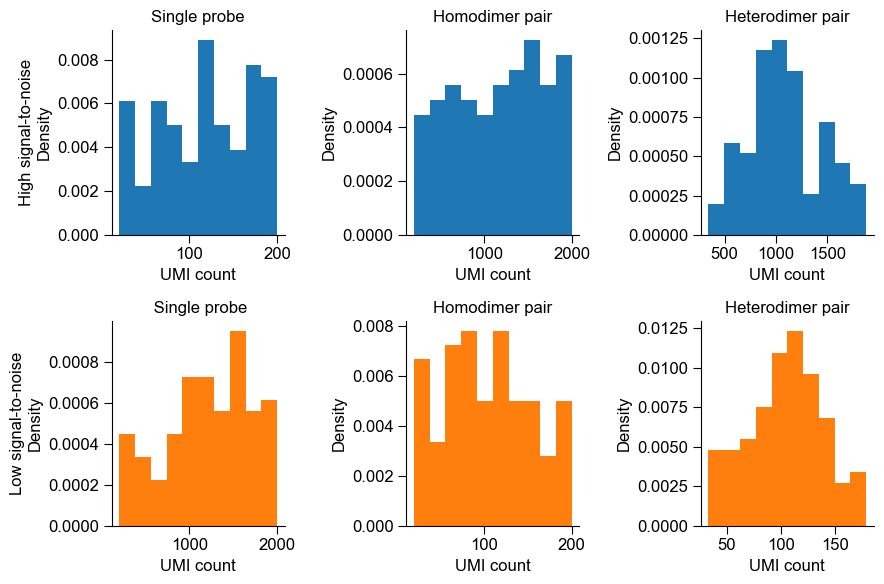

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(9, 6))

df_list = [probeA_df_h['3'], pla00_h, pla01_h, probeA_df_l['3'], pla00_l, pla01_l]
title = ['Single probe', 'Homodimer pair', 'Heterodimer pair',' Single probe', 'Homodimer pair', 'Heterodimer pair']

y_labels = ['High signal-to-noise', 'Low signal-to-noise']

for counter, (df, label) in enumerate(zip(df_list, title)):
    row = counter // 3
    col = counter % 3
    
    if row == 0:
        color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
    
    else:
        color = (1.0, 0.4980392156862745, 0.054901960784313725)
        
    ax[row][col].hist(df, bins=10, color=color, density=True)  
    ax[row][col].set_title(label)
    ax[row][col].set_xlabel('UMI count')
    ax[row][col].set_ylabel('Density')

# Add y-axis labels
ax[0][0].set_ylabel('High signal-to-noise\nDensity')
ax[1][0].set_ylabel('Low signal-to-noise\nDensity')

sns.despine(fig=fig)
fig.tight_layout()
fig.savefig(myDir+"input_distibution.svg",
            bbox_inches='tight', pad_inches=0)

In [29]:
default_palette = sns.color_palette()
print(default_palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


In [6]:
# Set parameters for the protein complexes (cell type 1)
num_complex = np.zeros((3,3))
num_complex[0,0] = 2000
num_complex[0,1] = 500
num_complex[1,0] = 500

# Set parameters for the non-interacting proteins
probeA = [200,1000,100]
probeB = [200,1000,100]

non_specific_prob_A = non_specific_prob_B = [0.2, 0.1, 0.05]
sim1 = PC.simulatePLA(protein_variance=True, mode = '2D', seed_num=1)
sim1.simulate(num_complex, probeA, probeB, non_specific_prob_A, non_specific_prob_B)

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=1.
2023-12-07 14:04:24     Start simulation
2023-12-07 14:04:25     Processed     10 cells
2023-12-07 14:04:26     Processed     20 cells
2023-12-07 14:04:28     Processed     30 cells
2023-12-07 14:04:30     Processed     40 cells
2023-12-07 14:04:31     Processed     50 cells
2023-12-07 14:04:32     Processed     60 cells
2023-12-07 14:04:33     Processed     70 cells
2023-12-07 14:04:35     Processed     80 cells
2023-12-07 14:04:36     Processed     90 cells
2023-12-07 14:04:37     Processed    100 cells


In [7]:
# Set parameters for the protein complexes (cell type 2)
num_complex = np.zeros((3,3))
num_complex[1,2] = 2000
num_complex[2,1] = 2000

# Set parameters for the non-interacting proteins
probeA = [100,500,2000]
probeB = [100,500,2000]

non_specific_prob_A = non_specific_prob_B = [0.2, 0.1, 0.05]
sim2 = PC.simulatePLA(protein_variance=True, mode = '2D', seed_num=10)
sim2.simulate(num_complex, probeA, probeB, non_specific_prob_A, non_specific_prob_B )

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=10.
2023-12-07 14:04:37     Start simulation
2023-12-07 14:04:40     Processed     10 cells
2023-12-07 14:04:43     Processed     20 cells
2023-12-07 14:04:45     Processed     30 cells
2023-12-07 14:04:49     Processed     40 cells
2023-12-07 14:04:51     Processed     50 cells
2023-12-07 14:04:53     Processed     60 cells
2023-12-07 14:04:55     Processed     70 cells
2023-12-07 14:04:57     Processed     80 cells
2023-12-07 14:04:59     Processed     90 cells
2023-12-07 14:05:02     Processed    100 cells


In [8]:
# Set parameters for the protein complexes (cell type 3)
num_complex = np.zeros((3,3))
num_complex[0,0] = 3000
num_complex[0,2] = 1000
num_complex[2,0] = 1000

# Set parameters for the non-interacting proteins
probeA = [1000,50,500]
probeB = [1000,50,500]

non_specific_prob_A = non_specific_prob_B = [0.2, 0.1, 0.05]
sim3 = PC.simulatePLA(protein_variance=True, mode = '2D', seed_num=100)
sim3.simulate(num_complex, probeA, probeB, non_specific_prob_A, non_specific_prob_B )

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=100.
2023-12-07 14:05:02     Start simulation
2023-12-07 14:05:04     Processed     10 cells
2023-12-07 14:05:08     Processed     20 cells
2023-12-07 14:05:10     Processed     30 cells
2023-12-07 14:05:13     Processed     40 cells
2023-12-07 14:05:15     Processed     50 cells
2023-12-07 14:05:17     Processed     60 cells
2023-12-07 14:05:18     Processed     70 cells
2023-12-07 14:05:21     Processed     80 cells
2023-12-07 14:05:25     Processed     90 cells
2023-12-07 14:05:27     Processed    100 cells


In [5]:
adata1 = sc.AnnData(X=sim1.pla_count.transpose())
adata2 = sc.AnnData(X=sim2.pla_count.transpose())
adata3 = sc.AnnData(X=sim3.pla_count.transpose())
adata1.obs['type'] = 'type1'
adata2.obs['type'] = 'type2'
adata3.obs['type'] = 'type3'

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
adata = sc.concat([adata1, adata2, adata3])

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
adata.layers["counts"] = adata.X.copy() # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4) # scale each cell to a common library size
sc.pp.log1p(adata) # log(expression + 1)
adata.raw = adata # freeze the state in `.raw`
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

In [8]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata,key_added='clusters',resolution=0.1)

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/p

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots

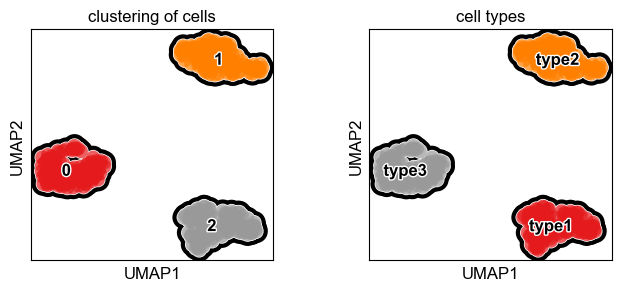

In [9]:
with plt.rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(adata, color=['clusters','type'], add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,
               title=['clustering of cells', 'cell types'], palette='Set1', show=False)
    plt.savefig(myDir+"cell_clustering.svg",
                bbox_inches='tight', pad_inches=0)

In [13]:
with plt.rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(adata, color=['1:1', '1:2', '1:3', '2:1', '2:2', '2:3', '3:1', '3:2', '3:3'], s=50, frameon=False, ncols=3, vmax='p99', show=False)
    plt.savefig(myDir+"cell_clustering2.svg",
                bbox_inches='tight', pad_inches=0)

In [11]:
marker_genes_dict = {
    'type 1': ['1:2', '2:1', '1:1'],
    'type 2': ['2:3', '3:2'],
    'type 3': ['1:3', '3:1', '1:1']
}

In [14]:
with plt.rc_context({'figure.figsize': (5, 5)}):
    sc.pl.dotplot(adata, marker_genes_dict, 'clusters', dendrogram=True, show=False)
    plt.savefig(myDir+"cell_clustering3.svg",
                bbox_inches='tight', pad_inches=0)

categories: 0, 1, 2
var_group_labels: type 1, type 2, type 3


/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


categories: type1, type2, type3
var_group_labels: type 1, type 2, type 3


/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


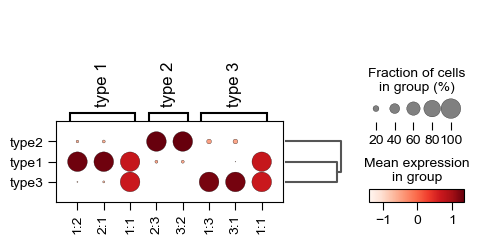

In [46]:
sc.pl.dotplot(adata, marker_genes_dict, 'type', dendrogram=True)


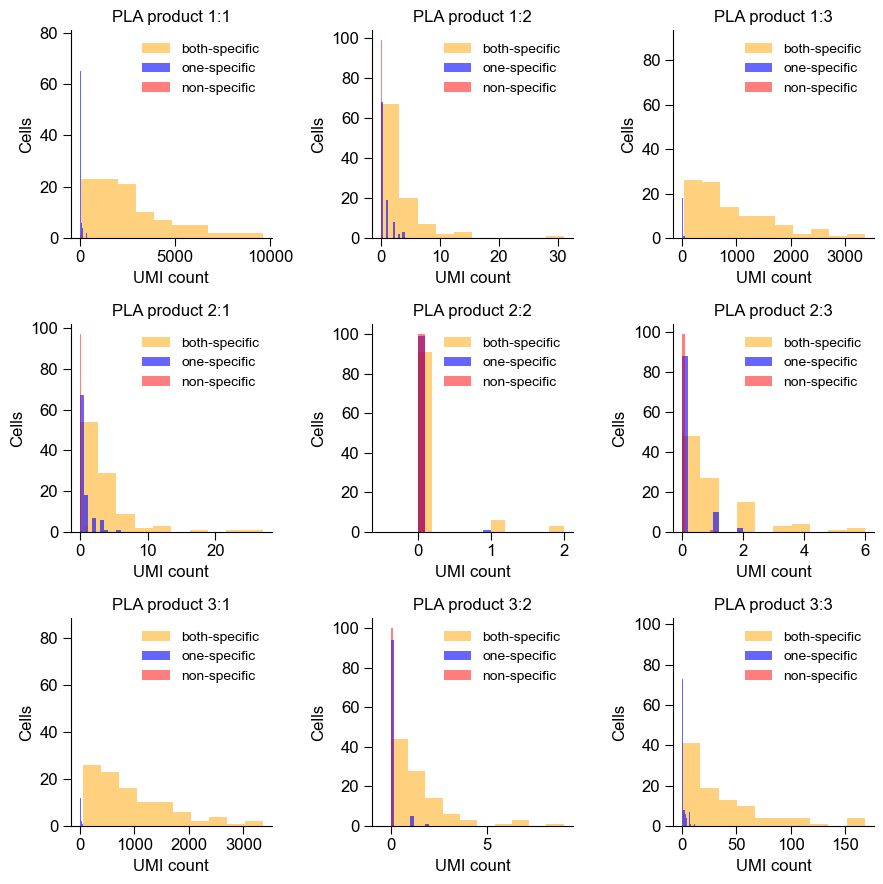

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(9,9))

my_pla = ['1:1', '1:2', '1:3', '2:1', '2:2', '2:3', '3:1', '3:2', '3:3']
for counter, pla in enumerate(my_pla):
    # Calculate the row and column indices for the subplot
    row = counter // 3
    col = counter % 3
    
    probeA, probeB = pla.split(':')

    # Plot the histograms for the current PLA
    ax[row,col].hist(sim3.pla_specific.loc[pla, :], label='both-specific', alpha=0.5, color='orange')
    ax[row,col].hist(sim3.pla_one_specific.loc[f'{probeA}_nsA:{probeB}', :] + sim3.pla_one_specific.loc[f'{probeA}:{probeB}_nsB', :], color='blue', label='one-specific', alpha=0.6)
    ax[row,col].hist(sim3.pla_non_specific.loc[f'{probeA}_nsA:{probeB}_nsB', :], color='red', label='non-specific', alpha=0.5)
    ax[row,col].set_title(f'PLA product {pla}')
    ax[row,col].set_xlabel('UMI count')
    ax[row,col].set_ylabel('Cells')
    ax[row,col].legend(frameon=False, loc='upper right', markerscale=0.5, fontsize='small')
    
sns.despine(fig=fig)
fig.tight_layout()
fig.savefig(myDir+"nonspecific.svg",
                bbox_inches='tight', pad_inches=0)

In [4]:
#%% Simulate Jurkat and Raji      **Figure S8**
jurkat_complex = np.array([ [240,50,0,0,0,0,0,0],
                            [50,300,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0]])
jurkat_atarget = np.array([50,330,3400,2400,16,3,100,1])
jurkat_btarget = np.array([50,330,3400,2400,16,3,100,1])
non_specific_prob_A = non_specific_prob_B = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
sim_jurkat = PC.simulatePLA(n_cells=100, cell_d=10000, PLA_dist=50, seed_num=2022,
                            protein_variance=True, ligate_all=False)
sim_jurkat.simulate(jurkat_complex, jurkat_atarget, jurkat_btarget, non_specific_prob_A, non_specific_prob_B )

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2022.
2023-11-02 16:38:50     Start simulation
2023-11-02 16:38:54     Processed     10 cells
2023-11-02 16:38:59     Processed     20 cells
2023-11-02 16:39:04     Processed     30 cells
2023-11-02 16:39:08     Processed     40 cells
2023-11-02 16:39:12     Processed     50 cells
2023-11-02 16:39:14     Processed     60 cells
2023-11-02 16:39:18     Processed     70 cells
2023-11-02 16:39:20     Processed     80 cells
2023-11-02 16:39:26     Processed     90 cells
2023-11-02 16:39:28     Processed    100 cells


In [3]:
raji_complex = np.array([ [0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,3000,0,0],
                          [0,0,0,0,0,0,500,0],
                          [0,0,0,0,0,0,0,0] ])
raji_atarget = np.array([5,60,30,1000,2500,3,5000,4])
raji_btarget = np.array([5,60,30,1000,2500,3,5000,4])
sim_raji = PC.simulatePLA(n_cells=100, cell_d=10000, PLA_dist=50, seed_num=2022,
                            protein_variance=True, ligate_all=False)
sim_raji.simulate(raji_complex, raji_atarget, raji_btarget, non_specific_prob_A, non_specific_prob_B)

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=2022.
2023-11-02 16:36:29     Start simulation
2023-11-02 16:36:46     Processed     10 cells
2023-11-02 16:36:51     Processed     20 cells
2023-11-02 16:36:59     Processed     30 cells
2023-11-02 16:37:08     Processed     40 cells
2023-11-02 16:37:14     Processed     50 cells
2023-11-02 16:37:25     Processed     60 cells
2023-11-02 16:37:34     Processed     70 cells
2023-11-02 16:37:40     Processed     80 cells
2023-11-02 16:37:47     Processed     90 cells
2023-11-02 16:38:24     Processed    100 cells


In [5]:
adata1 = sc.AnnData(X=sim_jurkat.pla_count.transpose())
adata2 = sc.AnnData(X=sim_raji.pla_count.transpose())
adata1.obs['type'] = 'jurkat'
adata2.obs['type'] = 'raji'
adata = sc.concat([adata1, adata2])

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
adata.layers["counts"] = adata.X.copy() # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4) # scale each cell to a common library size
sc.pp.log1p(adata) # log(expression + 1)
adata.raw = adata # freeze the state in `.raw`
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

In [7]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata,key_added='clusters',resolution=0.1)

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/p

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


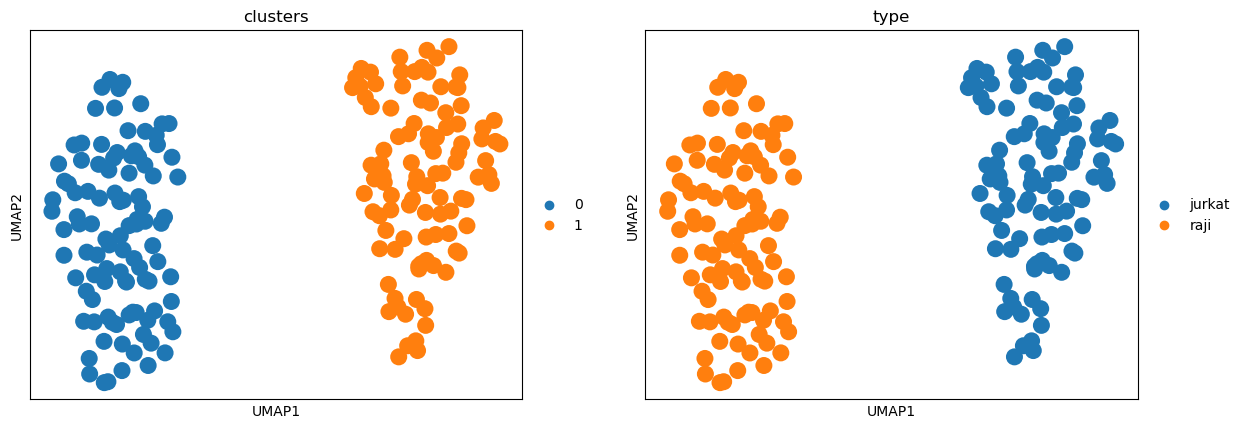

In [8]:
sc.pl.umap(adata,color=['clusters', 'type'])

In [ ]:
vars(sim_raji)

In [26]:
num_complex = np.zeros((3,3))
num_complex[0,0] = 200
num_complex[1,1] = 500
num_complex[0,1] = 1000
num_complex[1,0] = 1000

# Set parameters for the non-interacting proteins
probeA = [2000,50,1000]
probeB = [2000,50,1000]

non_specific_prob_A = non_specific_prob_B = [0.08, 0.08, 0.08]
sim1 = PC.simulatePLA(protein_variance=True, mode = '2D', seed_num=1)
sim1.simulate(num_complex, probeA, probeB, non_specific_prob_A, non_specific_prob_B )

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=1.
2023-11-02 16:51:57     Start simulation
2023-11-02 16:51:59     Processed     10 cells
2023-11-02 16:52:00     Processed     20 cells
2023-11-02 16:52:02     Processed     30 cells
2023-11-02 16:52:04     Processed     40 cells
2023-11-02 16:52:06     Processed     50 cells
2023-11-02 16:52:08     Processed     60 cells
2023-11-02 16:52:11     Processed     70 cells
2023-11-02 16:52:13     Processed     80 cells
2023-11-02 16:52:16     Processed     90 cells
2023-11-02 16:52:18     Processed    100 cells


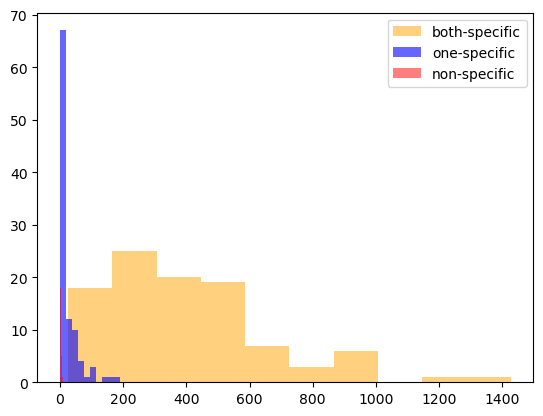

In [35]:
# Plot the histograms
plt.hist(sim1.pla_specific.loc['1:1',:], label='both-specific', alpha=0.5, color='orange')
plt.hist(sim1.pla_one_specific.loc['1_nsA:1',:] + sim1.pla_one_specific.loc['1:1_nsB',:], color='blue', label='one-specific', alpha=0.6)
plt.hist(sim1.pla_non_specific.loc['1_nsA:1_nsB',:], color='red', label='non-specific', alpha=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [9]:
sim.probe_count

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1_A,1556,233,966,1390,1198,122,398,188,969,219,...,1153,165,419,26,328,591,714,112,521,391
2_A,372,876,503,290,56,838,396,415,144,915,...,369,427,432,1402,456,499,1009,103,599,333
3_A,32,10,32,222,69,26,26,28,233,55,...,78,11,65,339,14,54,62,13,27,17
1_B,1556,233,966,1390,1198,122,398,188,969,219,...,1153,165,419,26,328,591,714,112,521,391
2_B,372,876,503,290,56,838,396,415,144,915,...,369,427,432,1402,456,499,1009,103,599,333
3_B,32,10,32,222,69,26,26,28,233,55,...,78,11,65,339,14,54,62,13,27,17


In [4]:
num_complex_i = np.array([[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]])
probeA_i = np.array([1,2,3])
probeB_i = np.array([1,2,3])

complex_probeA_targets = []
complex_probeB_targets = [] 

temp_probeA_i_targets = np.repeat([f"{s+1}" for s in range(len(probeA_i))], probeA_i)
temp_probeB_i_targets = np.repeat([f"{s+1}" for s in range(len(probeB_i))], probeB_i)

complex_probeA_targets = [[f"{s+1}" for _ in range(num_complex_i.shape[1])] for s in range(num_complex_i.shape[0])]
complex_probeA_targets = np.repeat(complex_probeA_targets, num_complex_i.flatten())
complex_probeB_targets = [[f"{s+1}" for s in range(num_complex_i.shape[1])] for _ in range(num_complex_i.shape[0])]
complex_probeB_targets = np.repeat(complex_probeB_targets, num_complex_i.flatten())


print(complex_probeA_targets)
print(complex_probeB_targets)
print(temp_probeA_i_targets)
print(temp_probeB_i_targets)

['1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3']
['1' '2' '2' '3' '3' '3' '1' '1' '1' '1' '2' '2' '2' '2' '2' '3' '3' '3'
 '3' '3' '3' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '3' '3' '3' '3' '3' '3' '3' '3']
['1' '2' '2' '3' '3' '3']
['1' '2' '2' '3' '3' '3']


In [5]:
probeA_targets = np.concatenate((temp_probeA_i_targets, complex_probeA_targets))
probeB_targets = np.concatenate((temp_probeB_i_targets, complex_probeB_targets))

print(probeA_targets)
print(probeB_targets)

['1' '2' '2' '3' '3' '3' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3']
['1' '2' '2' '3' '3' '3' '1' '2' '2' '3' '3' '3' '1' '1' '1' '1' '2' '2'
 '2' '2' '2' '3' '3' '3' '3' '3' '3' '1' '1' '1' '1' '1' '1' '1' '2' '2'
 '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3']
